# Student Id: c0900481
# Name:Jumoke Yekeen
# Course:AML 3104 Assignment3

In [ ]:
!pip install tensorflow

# Data Loading

In [2]:
# TensorFlow and tf.keras and important libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Show the shape of train and test datasets
print(f'Train images shape: {train_images.shape}')




Train images shape: (60000, 28, 28)


In [5]:
print(f'Test images shape: {test_images.shape}')

Test images shape: (10000, 28, 28)


# **Data Pre-Processing**

In [6]:
# Assign labels name before feeding the network
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


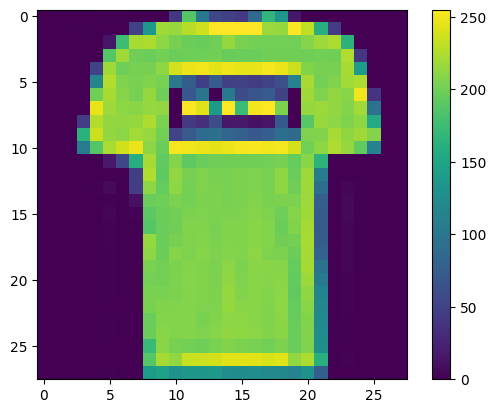

In [7]:
# Inspect a sample image and its pixel values
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Scaling the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# **Visualizations**

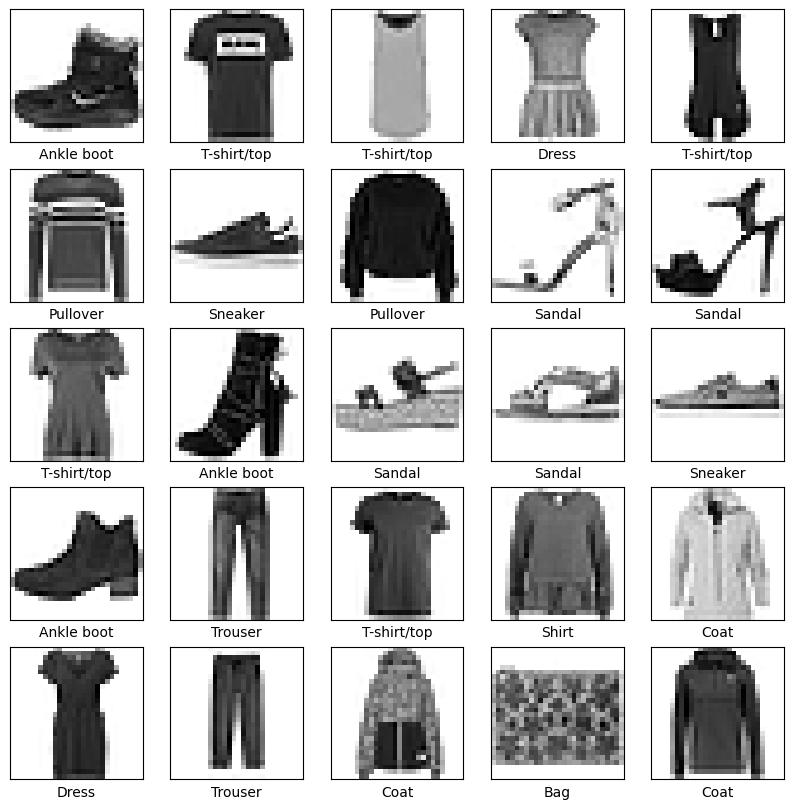

In [ ]:
 #Display the first 25 images from the training dataset with their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

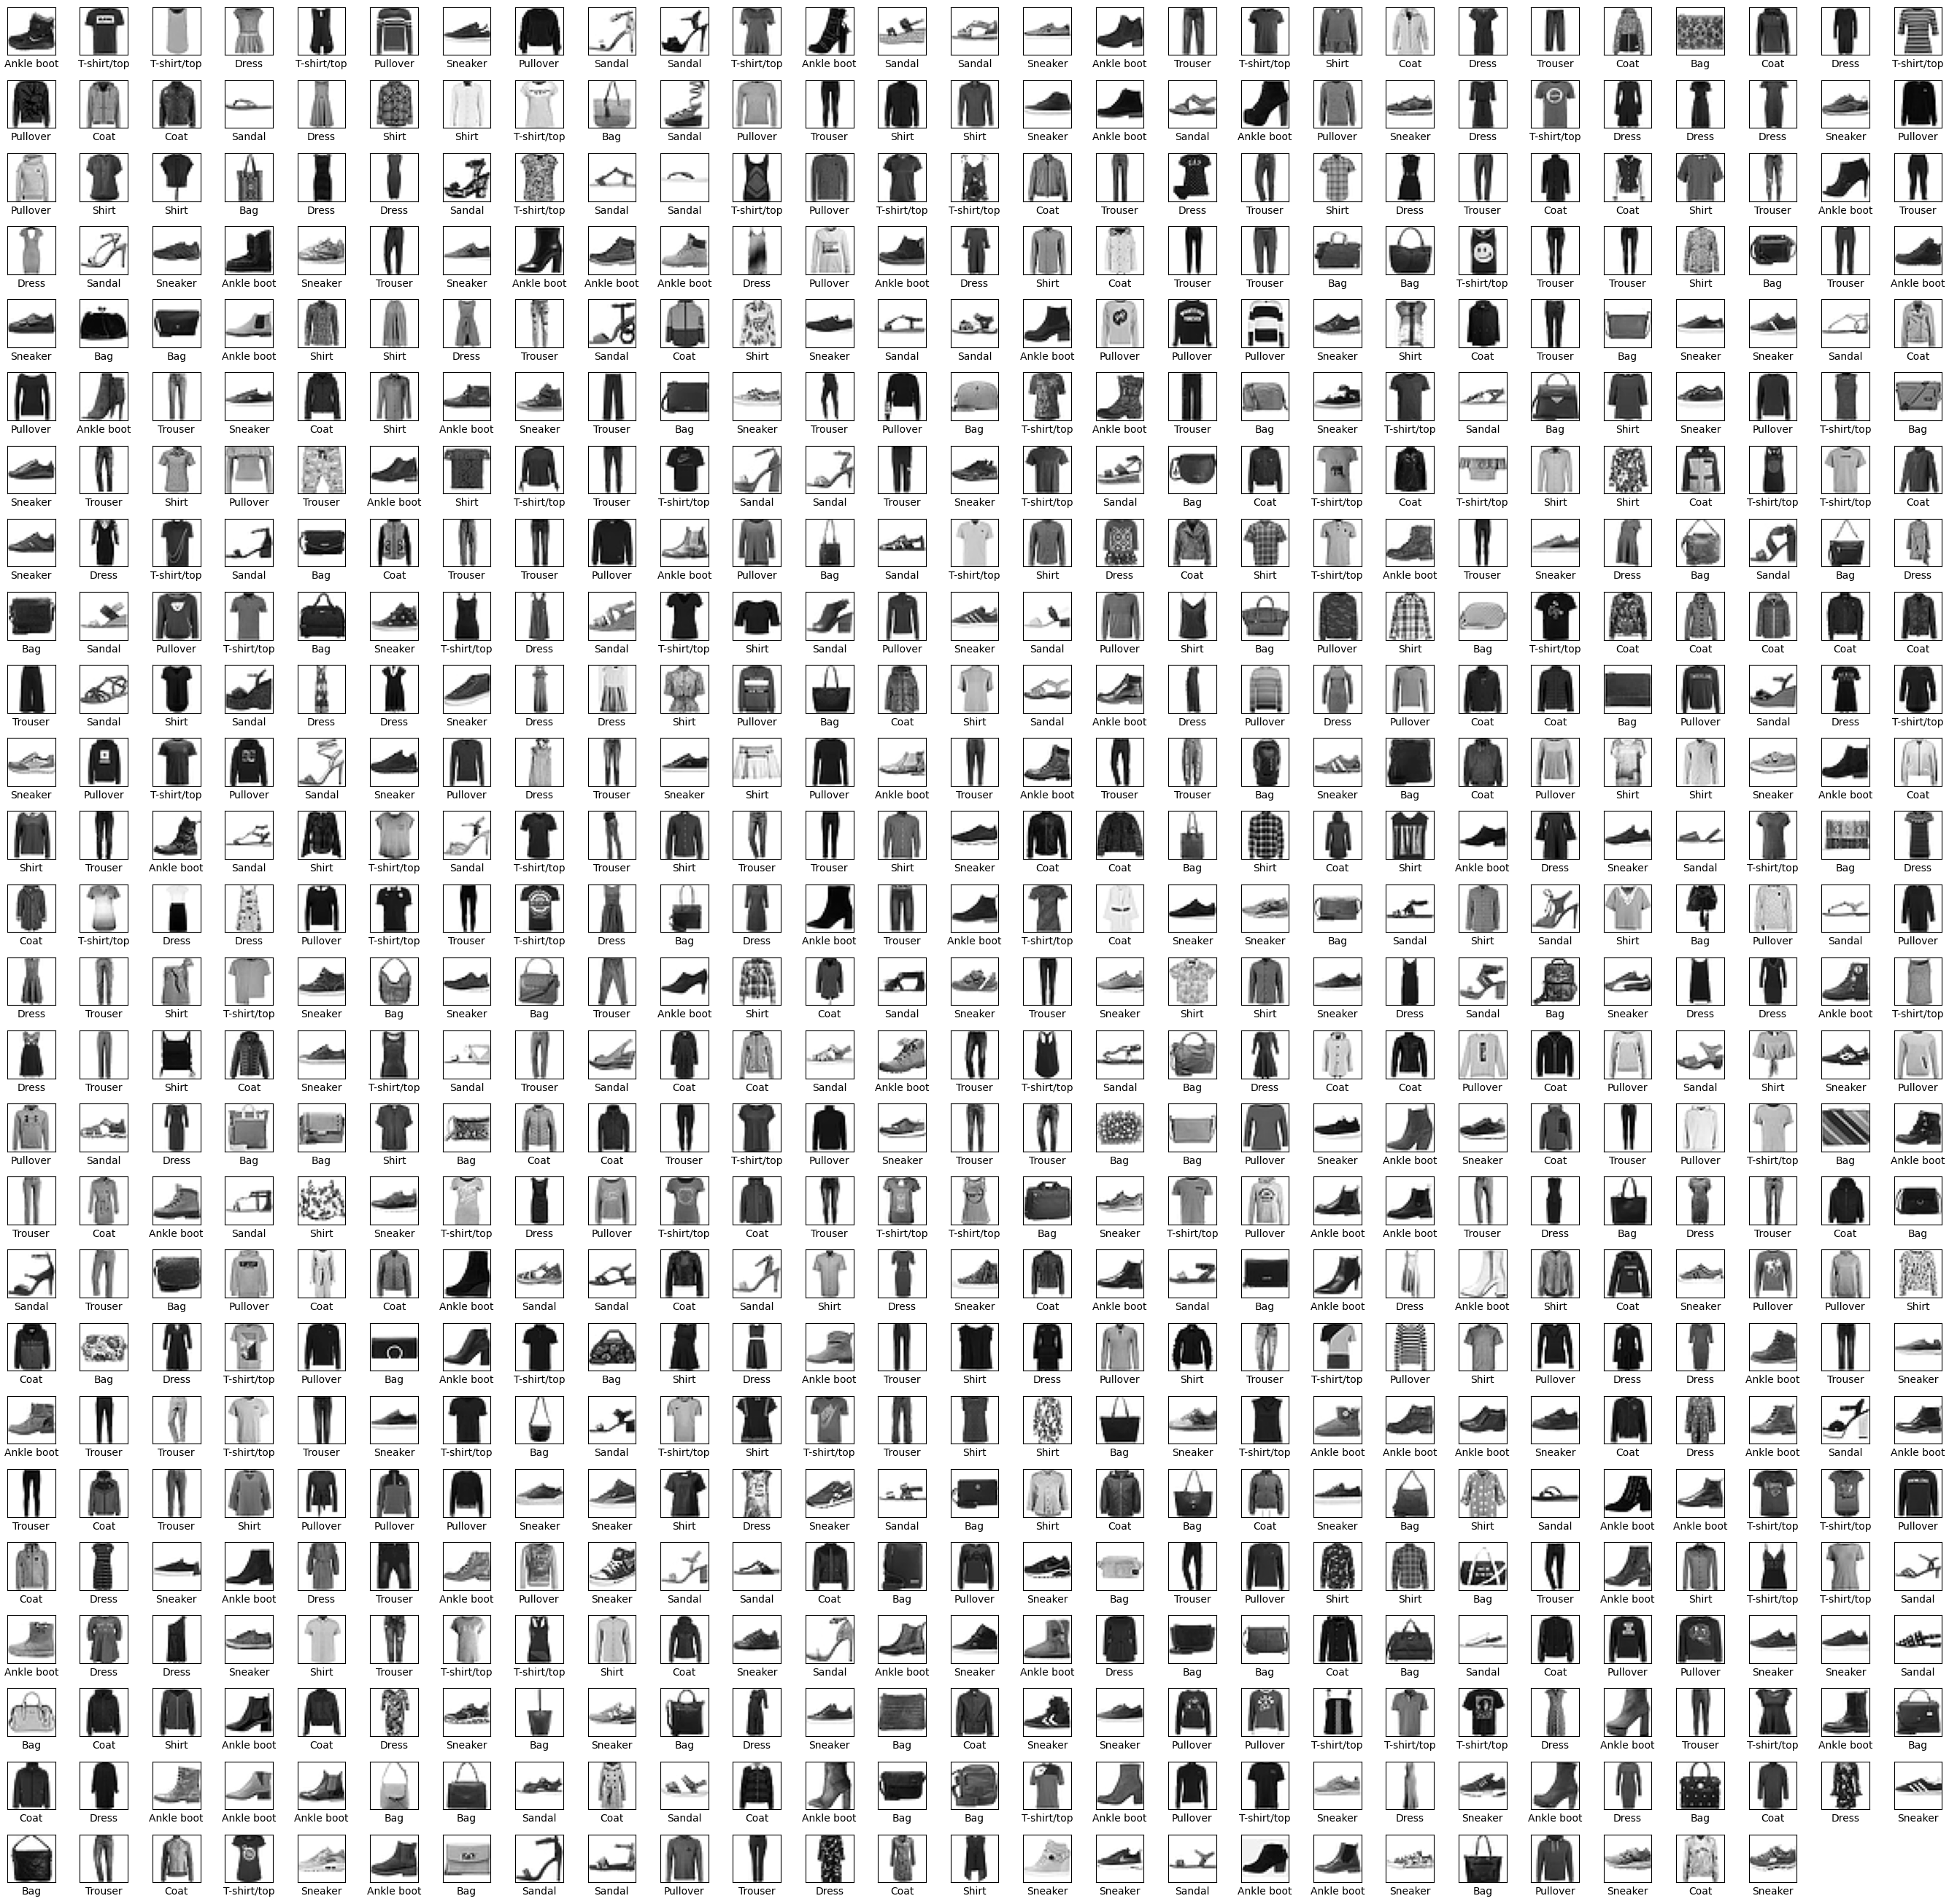

In [ ]:
# Function to visualize and save a grid of images from the dataset
# Determine the grid size and the number of images to display

def visualize_and_save_all_images(images, labels, class_names, filename='fashion_mnist_visualization.png'):

    num_images = 700
    grid_size = int(np.ceil(np.sqrt(num_images)))

    # Create a large figure
    plt.figure(figsize=(grid_size, grid_size))

    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Visualize  training images
visualize_and_save_all_images(train_images, train_labels, class_names, filename='fashion_mnist_train_visualization.png')


# **Model Build**

**Model 1 (3 Layers ANN model)**

In [8]:
# Build a simple ANN model
model_1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])



# **Model1 Compile, train and Evaluation**

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 3.8337 - accuracy: 0.6694 - val_loss: 0.8346 - val_accuracy: 0.7028
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7237 - accuracy: 0.7449 - val_loss: 0.7087 - val_accuracy: 0.7484
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6363 - accuracy: 0.7721 - val_loss: 0.6158 - val_accuracy: 0.7815
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5792 - accuracy: 0.7940 - val_loss: 0.7154 - val_accuracy: 0.7440
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5381 - accuracy: 0.8129 - val_loss: 0.6613 - val_accuracy: 0.7694
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5149 - accuracy: 0.8204 - val_loss: 0.5363 - val_accuracy: 0.8198
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5040 - accuracy: 0.8252 - val_loss: 0.5407 - val_accuracy:

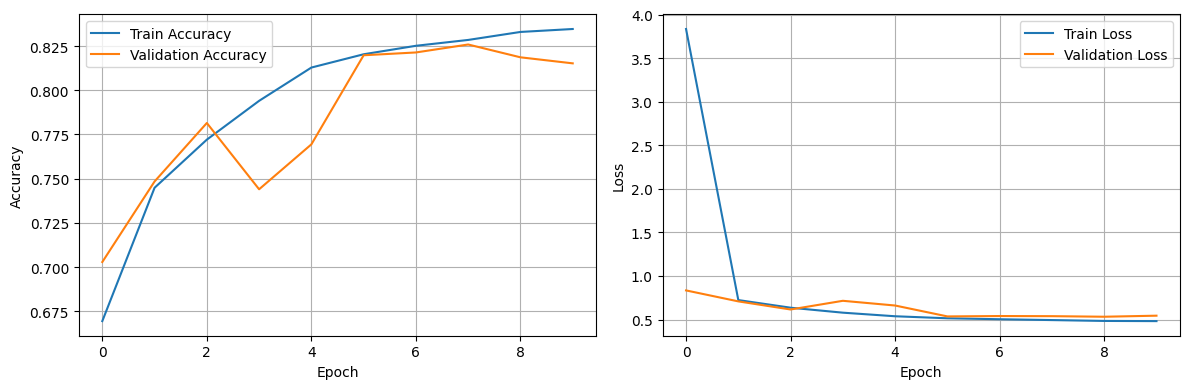

In [10]:
# Function to compile, train, and evaluate the model
def compile_train_evaluate(model):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print('\nTest accuracy:', test_acc)

    # Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Compile, train, and evaluate the model
compile_train_evaluate(model_1)

# Model 1 prediction

In [11]:


# Function to display a few sample predictions along with the corresponding images
def display_sample_predictions(model, test_images, test_labels, class_names, num_samples=10):
    # Predict classes for the test set
    predictions = model.predict(test_images)

    # Select a few random samples to display
    random_indices = np.random.choice(test_images.shape[0], num_samples, replace=False)
    sample_images = test_images[random_indices]
    sample_labels = test_labels[random_indices]
    sample_predictions = np.argmax(predictions[random_indices], axis=1)

    # Plot the sample images along with predictions
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 2, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(sample_images[i], cmap=plt.cm.binary)
        color = 'green' if sample_predictions[i] == sample_labels[i] else 'red'
        plt.xlabel(f"True: {sample_labels[i]}\nPredicted: {sample_predictions[i]}", color=color)
    plt.tight_layout()
    plt.show()



# **Model1 Prediction**

313/313 [==============================] - 1s 2ms/step


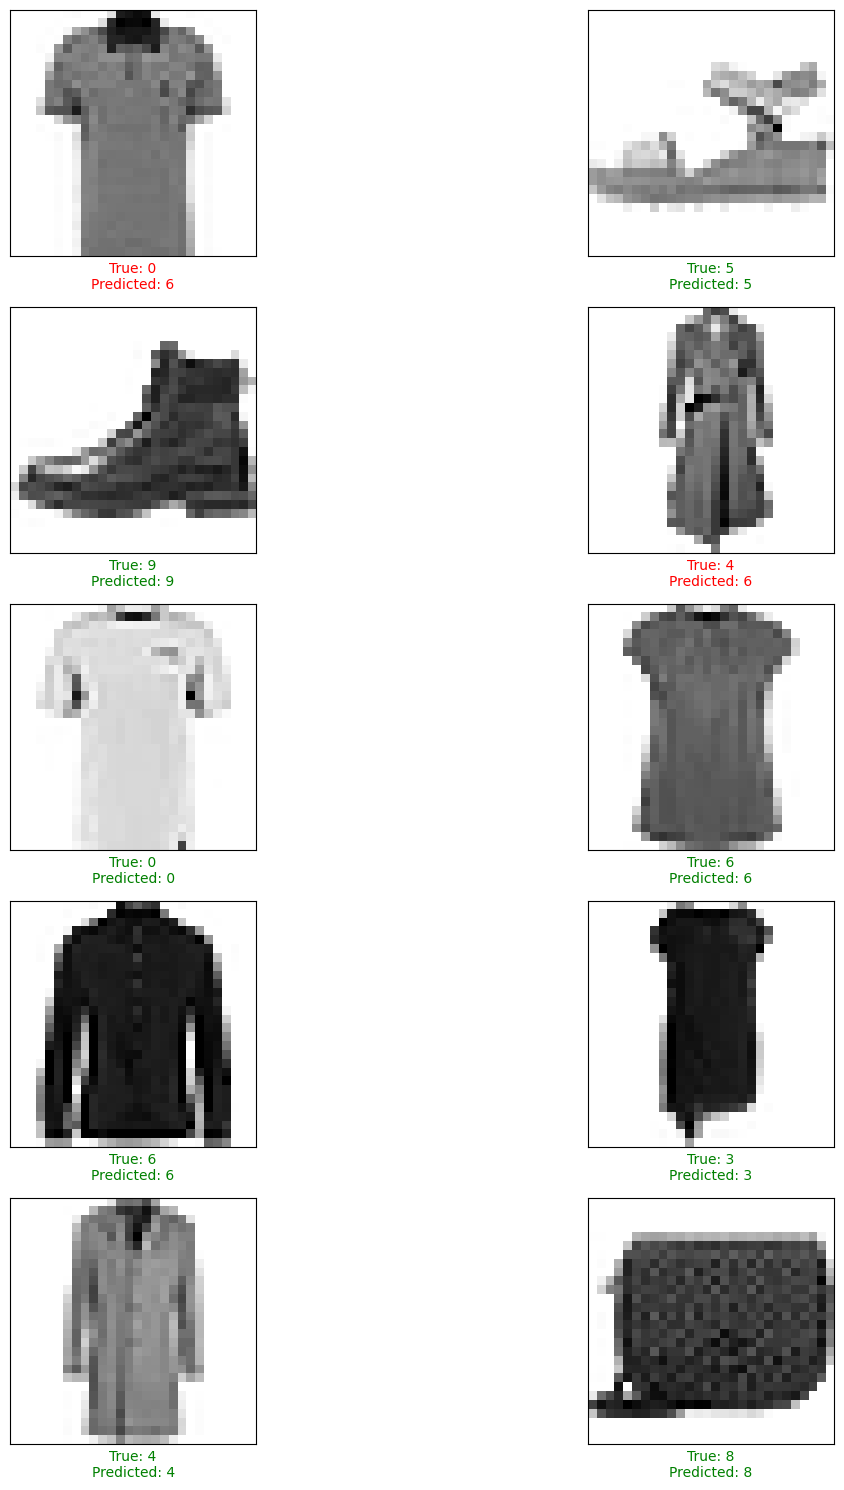

In [32]:
# Define class names for MNIST digits
class_names = [str(i) for i in range(10)]

# Display sample predictions
display_sample_predictions(model_1, test_images, test_labels, class_names)

# Model 2 (5 layers ANN model)

In [13]:
# Build an enhanced ANN model with additional layers
model_2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'), # Additional hidden layer
    layers.Dense(32, activation='relu'), # Additional hidden layer
    layers.Dense(10, activation='softmax')
])



# Model2 Compile, Train and Evaluation

In [19]:

# Compile the model
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model and include validation data
history = model_2.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Function to display a few sample predictions along with the corresponding images
def display_sample_predictions(model, test_images, test_labels, class_names, num_samples=10):
    # Predict classes for the test set
    predictions = model.predict(test_images)

    # Select a few random samples to display
    random_indices = np.random.choice(test_images.shape[0], num_samples, replace=False)
    sample_images = test_images[random_indices]
    sample_labels = test_labels[random_indices]
    sample_predictions = np.argmax(predictions[random_indices], axis=1)

    # Plot the sample images along with predictions
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 2, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(sample_images[i], cmap=plt.cm.binary)
        color = 'green' if sample_predictions[i] == sample_labels[i] else 'red'
        plt.xlabel(f"True: {sample_labels[i]}\nPredicted: {sample_predictions[i]}", color=color)
    plt.tight_layout()
    plt.show()





Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2937 - accuracy: 0.8922 - val_loss: 0.4055 - val_accuracy: 0.8707
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2882 - accuracy: 0.8945 - val_loss: 0.4006 - val_accuracy: 0.8748
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2828 - accuracy: 0.8965 - val_loss: 0.4107 - val_accuracy: 0.8776
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2762 - accuracy: 0.8985 - val_loss: 0.3947 - val_accuracy: 0.8740
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2794 - accuracy: 0.8979 - val_loss: 0.4434 - val_accuracy: 0.8550
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2663 - accuracy: 0.8992 - val_loss: 0.4033 - val_accuracy: 0.8809
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2672 - accuracy: 0.9028 - val_loss: 0.4577 - val_accuracy:

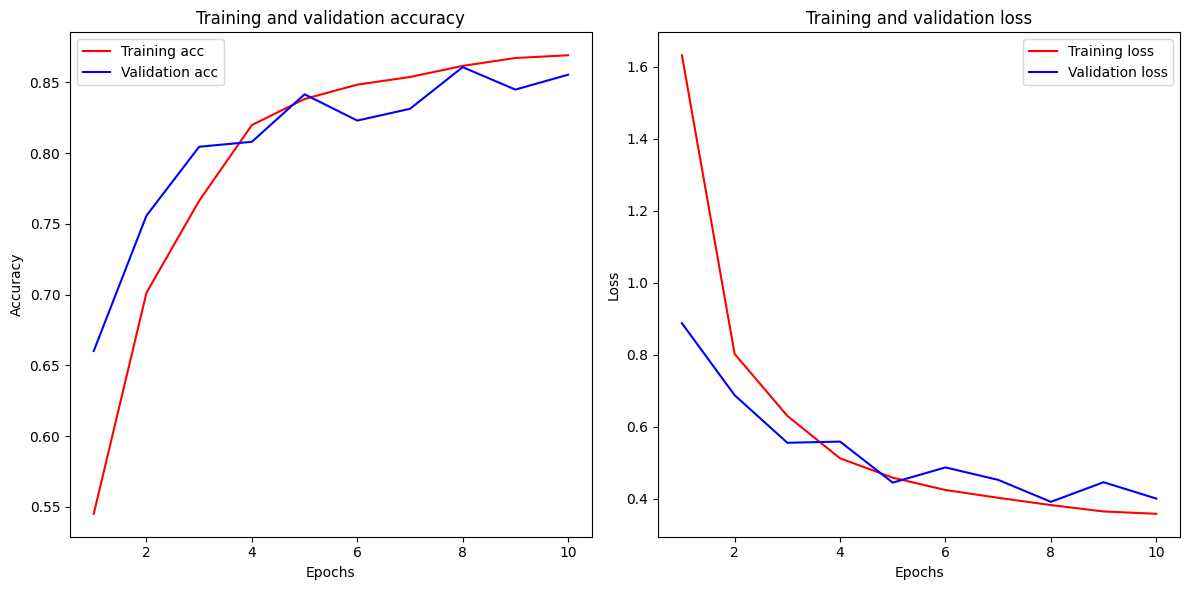

In [15]:


# Plot training & validation accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

# Model2 Prediction

313/313 [==============================] - 1s 3ms/step


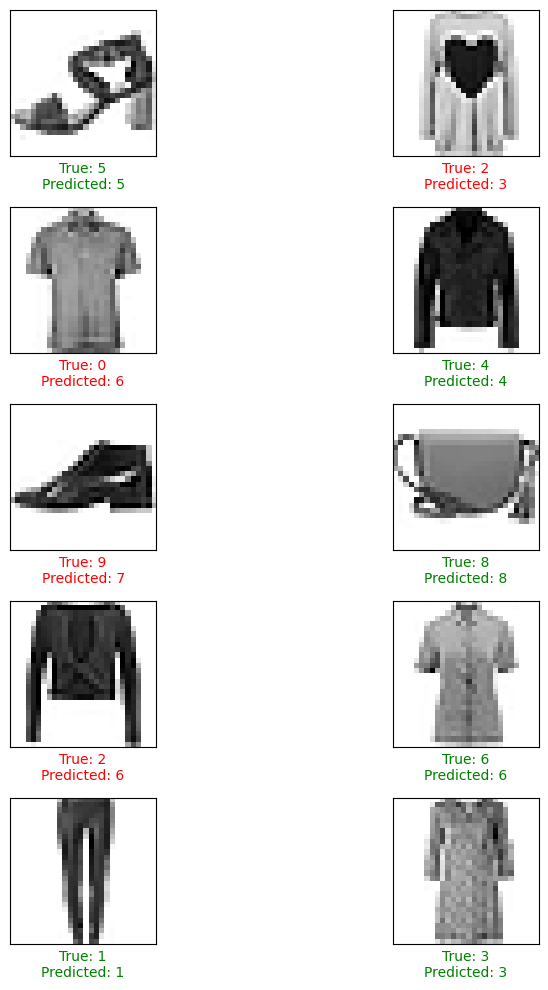

In [20]:
# Define class names for MNIST digits
class_names = [str(i) for i in range(10)]

# Display sample predictions
display_sample_predictions(model_2, test_images, test_labels, class_names)

# **Summary of the two models performace**
1.**Training Accuracy**: The 5-layer model consistently achieves higher training accuracy compared to the 3-layer model.
2. **Validation Accuracy:** The 5-layer model also shows higher validation accuracy throughout the epochs.
3.** Loss:** The 5-layer model demonstrates lower training and validation losses, indicating better overall performance.
4.** Generalization:** The 5-layer model performs better on the test data, with higher accuracy and lower loss compared to the 3-layer model.

# **Conclusively,** the 5-layer model performs significantly better in terms of both accuracy and loss compared to the 3-layer model.